In [1]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from __future__ import division

In [21]:
poll_df = pd.read_csv('2016-general-election-trump-vs-clinton.csv')
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Clinton,Trump,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation
0,Morning Consult,2016-06-15,2016-06-20,2016-06-20T20:29:18Z,3891.0,Registered Voters,Internet,42,40,17.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/06/20/poll-orl...,Nonpartisan,None
1,ARG,2016-06-17,2016-06-20,2016-06-21T15:05:57Z,987.0,Registered Voters,Live Phone,50,41,6.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2016/na16...,Nonpartisan,None
2,YouGov/Economist,2016-06-18,2016-06-20,2016-06-22T15:37:22Z,911.0,Registered Voters,Internet,43,39,7.0,11.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/06/21/natio...,Nonpartisan,None
3,Morning Consult,2016-06-15,2016-06-20,2016-06-20T20:29:18Z,1451.0,Registered Voters - Democrat,Internet,80,10,10.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/06/20/poll-orl...,Nonpartisan,None
4,YouGov/Economist,2016-06-18,2016-06-20,2016-06-22T15:37:22Z,425.0,Registered Voters - Democrat,Internet,86,6,4.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/06/21/natio...,Nonpartisan,None


In [22]:
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466 entries, 0 to 465
Data columns (total 15 columns):
Pollster                  466 non-null object
Start Date                466 non-null object
End Date                  466 non-null object
Entry Date/Time (ET)      466 non-null object
Number of Observations    358 non-null float64
Population                466 non-null object
Mode                      466 non-null object
Clinton                   466 non-null int64
Trump                     466 non-null int64
Undecided                 452 non-null float64
Other                     219 non-null float64
Pollster URL              466 non-null object
Source URL                466 non-null object
Partisan                  466 non-null object
Affiliation               466 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 54.7+ KB


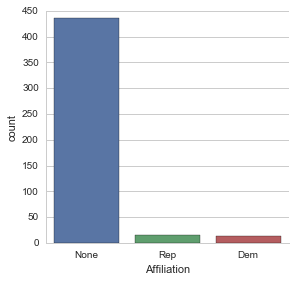

In [23]:
sns.factorplot('Affiliation',data=poll_df,kind='count')

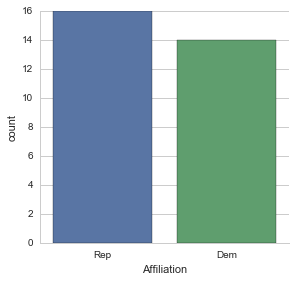

In [24]:
sns.factorplot('Affiliation',data=poll_df,kind='count', order=['Rep', 'Dem'])

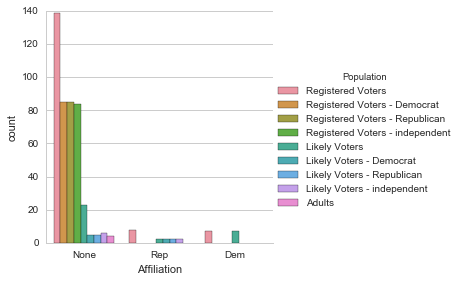

In [25]:
sns.factorplot('Affiliation',data=poll_df,kind='count',hue='Population')

In [26]:
avg = pd.DataFrame(poll_df.mean())
avg.drop('Number of Observations',axis=0,inplace=True)

In [27]:
avg

,0
Clinton,45.158798
Trump,41.214592
Undecided,10.353982
Other,6.013699


Clearly the undecided votes can swing this election

In [28]:
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)

In [29]:
std

,0
Clinton,23.969436
Trump,22.010972
Undecided,6.310053
Other,5.773619


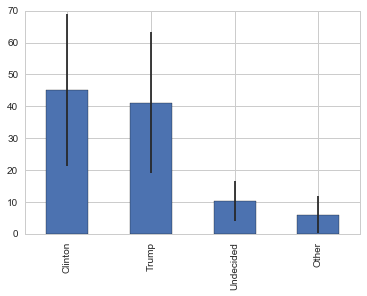

In [30]:
avg.plot(yerr=std,kind='bar',legend=False)

Huge standard deviation!

In [31]:
poll_avg = pd.concat([avg,std],axis=1)
poll_avg.columns = ['Average','STD']
poll_avg

,Average,STD
Clinton,45.158798,23.969436
Trump,41.214592,22.010972
Undecided,10.353982,6.310053
Other,6.013699,5.773619


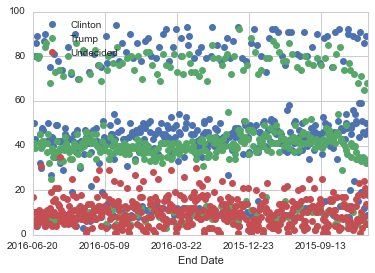

In [32]:
poll_df.plot(x='End Date',y = ['Clinton','Trump','Undecided'],
             linestyle='',marker='o')

Doesn't look like the number of undecided voters has decreased much in the past year.

In [33]:
from datetime import datetime
poll_df['Difference']= (poll_df['Clinton'] - poll_df['Trump'])/100
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Clinton,Trump,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,Morning Consult,2016-06-15,2016-06-20,2016-06-20T20:29:18Z,3891.0,Registered Voters,Internet,42,40,17.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/06/20/poll-orl...,Nonpartisan,None,0.02
1,ARG,2016-06-17,2016-06-20,2016-06-21T15:05:57Z,987.0,Registered Voters,Live Phone,50,41,6.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://americanresearchgroup.com/pres2016/na16...,Nonpartisan,None,0.09
2,YouGov/Economist,2016-06-18,2016-06-20,2016-06-22T15:37:22Z,911.0,Registered Voters,Internet,43,39,7.0,11.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/06/21/natio...,Nonpartisan,None,0.04
3,Morning Consult,2016-06-15,2016-06-20,2016-06-20T20:29:18Z,1451.0,Registered Voters - Democrat,Internet,80,10,10.0,NaN,http://elections.huffingtonpost.com/pollster/p...,https://morningconsult.com/2016/06/20/poll-orl...,Nonpartisan,None,0.70
4,YouGov/Economist,2016-06-18,2016-06-20,2016-06-22T15:37:22Z,425.0,Registered Voters - Democrat,Internet,86,6,4.0,4.0,http://elections.huffingtonpost.com/pollster/p...,https://today.yougov.com/news/2016/06/21/natio...,Nonpartisan,None,0.80


In [34]:
combo_dates_df = poll_df.groupby(['Start Date'],as_index=False).mean()
combo_dates_df.head()

,Start Date,Number of Observations,Clinton,Trump,Undecided,Other,Difference
0,2015-05-19,1046.00,48.75,34.25,14.00,2.5,0.1450
1,2015-06-20,420.75,47.25,35.00,17.75,NaN,0.1225
2,2015-06-21,1005.00,51.00,34.00,3.00,3.0,0.1700
3,2015-06-26,890.00,57.00,36.75,6.00,0.0,0.2025
4,2015-07-09,499.25,49.50,35.25,16.00,NaN,0.1425


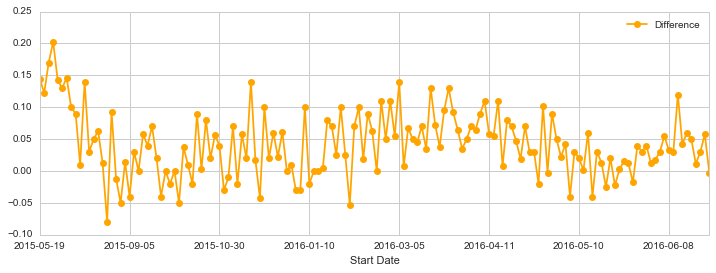

In [35]:
combo_dates_df.plot('Start Date','Difference',figsize=(12,4),marker='o',
             linestyle='-',color='orange')

Let's see which pollsters had Trump with the largest lead

In [36]:
combo_dates_df[combo_dates_df['Difference']==combo_dates_df['Difference'].min()]

,Start Date,Number of Observations,Clinton,Trump,Undecided,Other,Difference
15,2015-08-21,3567.0,46.0,54.0,NaN,NaN,-0.08


In [67]:
poll_df[poll_df['Start Date']=='2015-08-21']

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Clinton,Trump,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Difference
423,Gravis Marketing/OANN,2015-08-21,2015-08-22,2015-08-28T01:14:31Z,3567.0,Registered Voters,Automated Phone,46,54,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.oann.com/trump-breaks-new-ceiling-i...,Sponsor,Rep,-0.08


Looks like this was a republican  affiliated poll.

More investigation to be done closer to November after some debates so we can see how they swing the polls pre-election.

In [82]:
pollster_df = poll_df.groupby(['Pollster'],as_index=False).mean()

In [83]:
pollster_df.head()

,Pollster,Number of Observations,Clinton,Trump,Undecided,Other,Difference
0,ABC/Post,875.250,47.500,43.5,1.0,1.250000,0.04000
1,ARG,983.500,47.800,43.2,6.4,2.600000,0.04600
2,Bloomberg/Selzer,782.500,51.500,36.5,6.5,9.000000,0.15000
3,CBS,528.375,45.625,39.5,12.0,3.428571,0.06125
4,CBS/Times,1083.500,47.600,41.6,10.0,1.500000,0.06000


In [84]:
pollster_df['Pollster'].count()

31

In [85]:
pollster_df=pollster_df.drop(pollster_df.columns[[1,4,5,6]], axis=1)

In [86]:
pollster_df=pollster_df.set_index('Pollster')

In [87]:
pollster_df.head()

,Clinton,Trump
Pollster,,
ABC/Post,47.500,43.5
ARG,47.800,43.2
Bloomberg/Selzer,51.500,36.5
CBS,45.625,39.5
CBS/Times,47.600,41.6


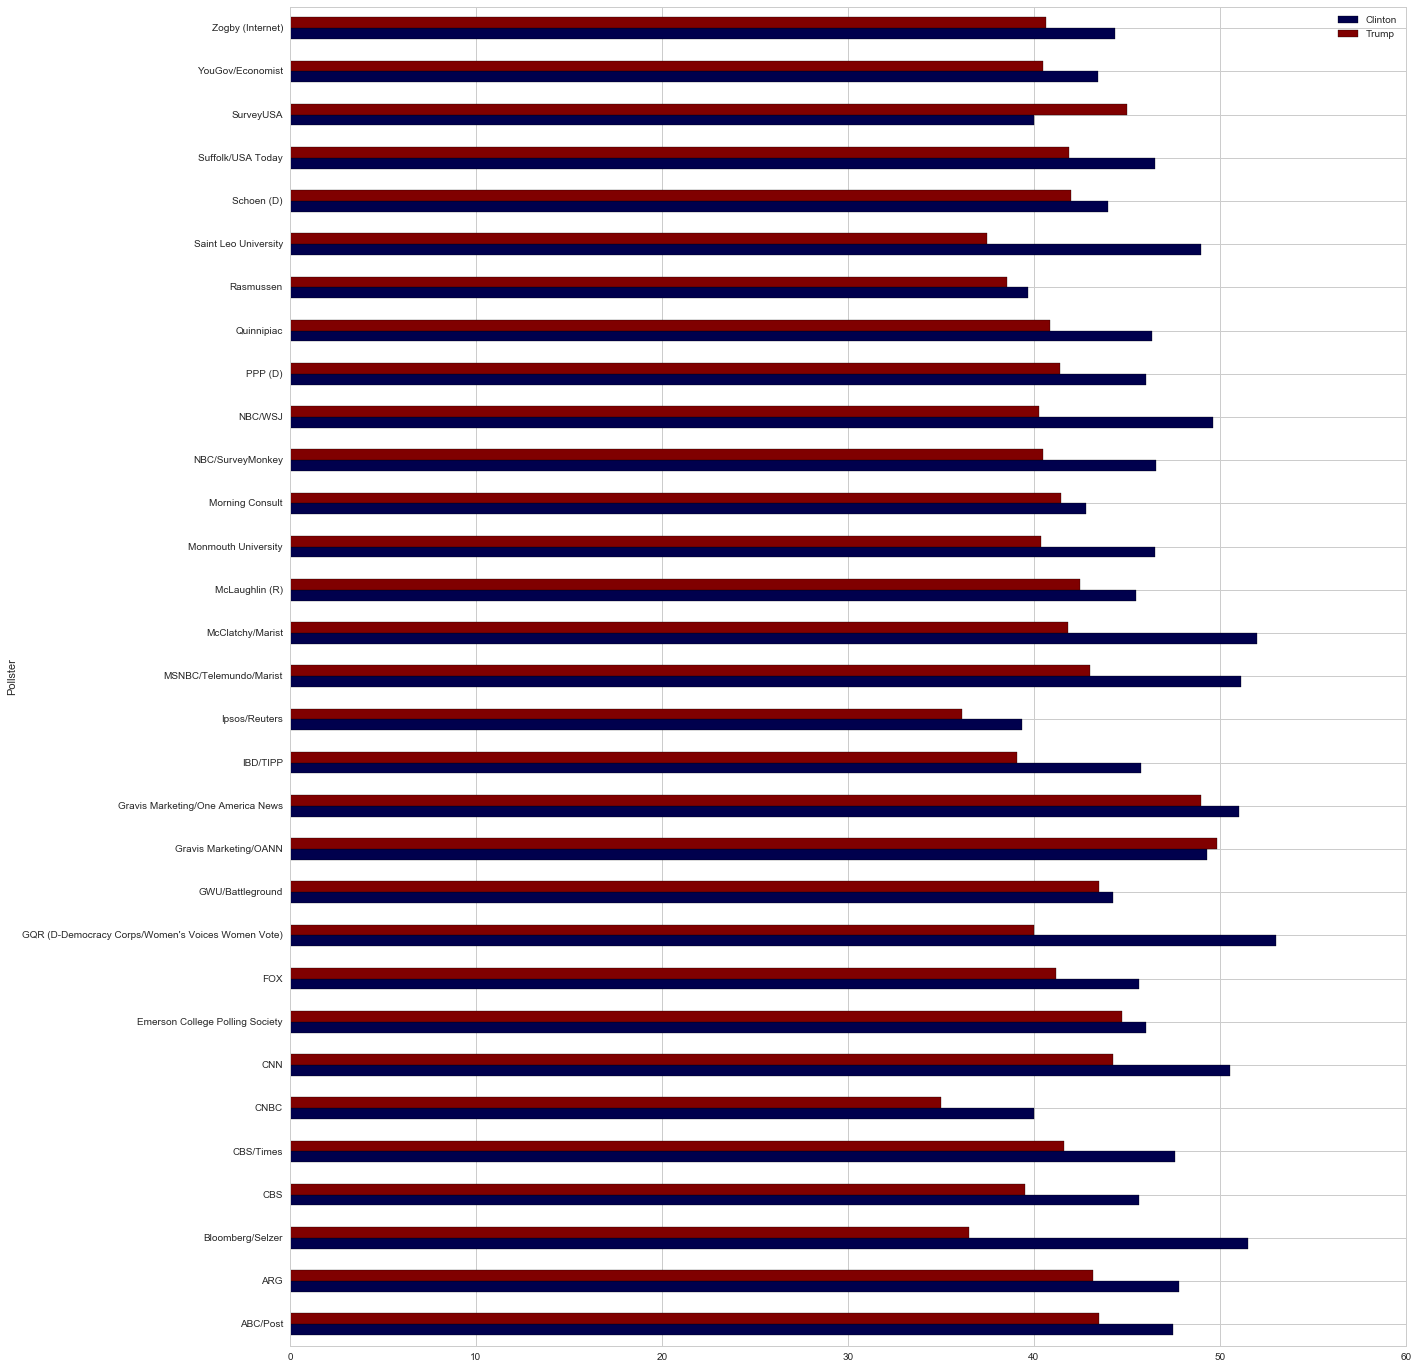

In [88]:
pollster_df.plot(kind='barh',figsize=(20,24),cmap='seismic')

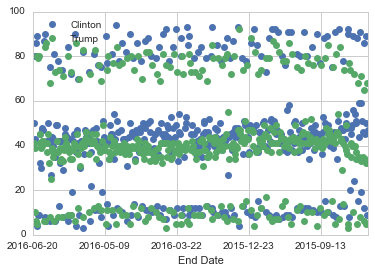

In [89]:
poll_df.plot(x='End Date',y = ['Clinton','Trump'],
             linestyle='',marker='o')

In [91]:
poll_df=poll_df.sort('End Date')

C:\Users\yanke_000\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [95]:
#remove polls where number of observations is not available
poll_df=poll_df.dropna()
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Clinton,Trump,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Difference
462,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,1711.0,Registered Voters,Live Phone,50,32,14.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://www.quinnipiac.edu/images/polling/us/us...,Nonpartisan,None,0.18
464,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,679.0,Registered Voters - Republican,Live Phone,9,68,19.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.quinnipiac.edu/images/polling/us/us...,Nonpartisan,None,-0.59
463,Quinnipiac,2015-05-19,2015-05-26,2015-05-28T21:52:59Z,748.0,Registered Voters - Democrat,Live Phone,89,5,5.0,0.0,http://elections.huffingtonpost.com/pollster/p...,http://www.quinnipiac.edu/images/polling/us/us...,Nonpartisan,None,0.84
457,FOX,2015-06-21,2015-06-23,2015-06-25T19:39:57Z,1005.0,Registered Voters,Live Phone,51,34,3.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://www.foxnews.com/politics/interactive/20...,Nonpartisan,None,0.17
453,CNN,2015-06-26,2015-06-28,2015-07-01T18:33:34Z,890.0,Registered Voters,Live Phone,59,35,6.0,0.0,http://elections.huffingtonpost.com/pollster/p...,http://i2.cdn.turner.com/cnn/2015/images/06/30...,Nonpartisan,None,0.24


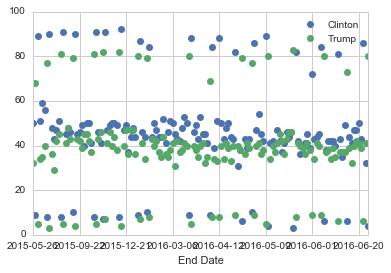

In [96]:
poll_df.plot(x='End Date',y = ['Clinton','Trump'],
             linestyle='',marker='o')